<a href="https://colab.research.google.com/github/amenibelhadj/Notebooks/blob/main/Feu_Avant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [2]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.9/78.2 GB disk)


In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="O7TF3moPfhkdv1OpXzRo")
project = rf.workspace("dataameni").project("feu-avant")
version = project.version(1)
dataset = version.download("yolov5")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.7/71.7 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 9.0 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Feu-Avant-1 in yolov5pytorch:: 100%|██████████| 194/194 [00:00<00:00, 6796.03it/s]


In [4]:
from ultralytics import YOLO
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data=/content/Feu-Avant-1/data.yaml epochs=25 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 216MB/s]
New https://pypi.org/project/ultralytics/8.1.29 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Feu-Avant-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False,

In [5]:
!ls {HOME}/runs/detect/train/

args.yaml					    P_curve.png       train_batch2.jpg
confusion_matrix_normalized.png			    PR_curve.png      train_batch75.jpg
confusion_matrix.png				    R_curve.png       train_batch76.jpg
events.out.tfevents.1710684317.26061f36c2c5.1533.0  results.csv       train_batch77.jpg
F1_curve.png					    results.png       val_batch0_labels.jpg
labels_correlogram.jpg				    train_batch0.jpg  val_batch0_pred.jpg
labels.jpg					    train_batch1.jpg  weights


/content


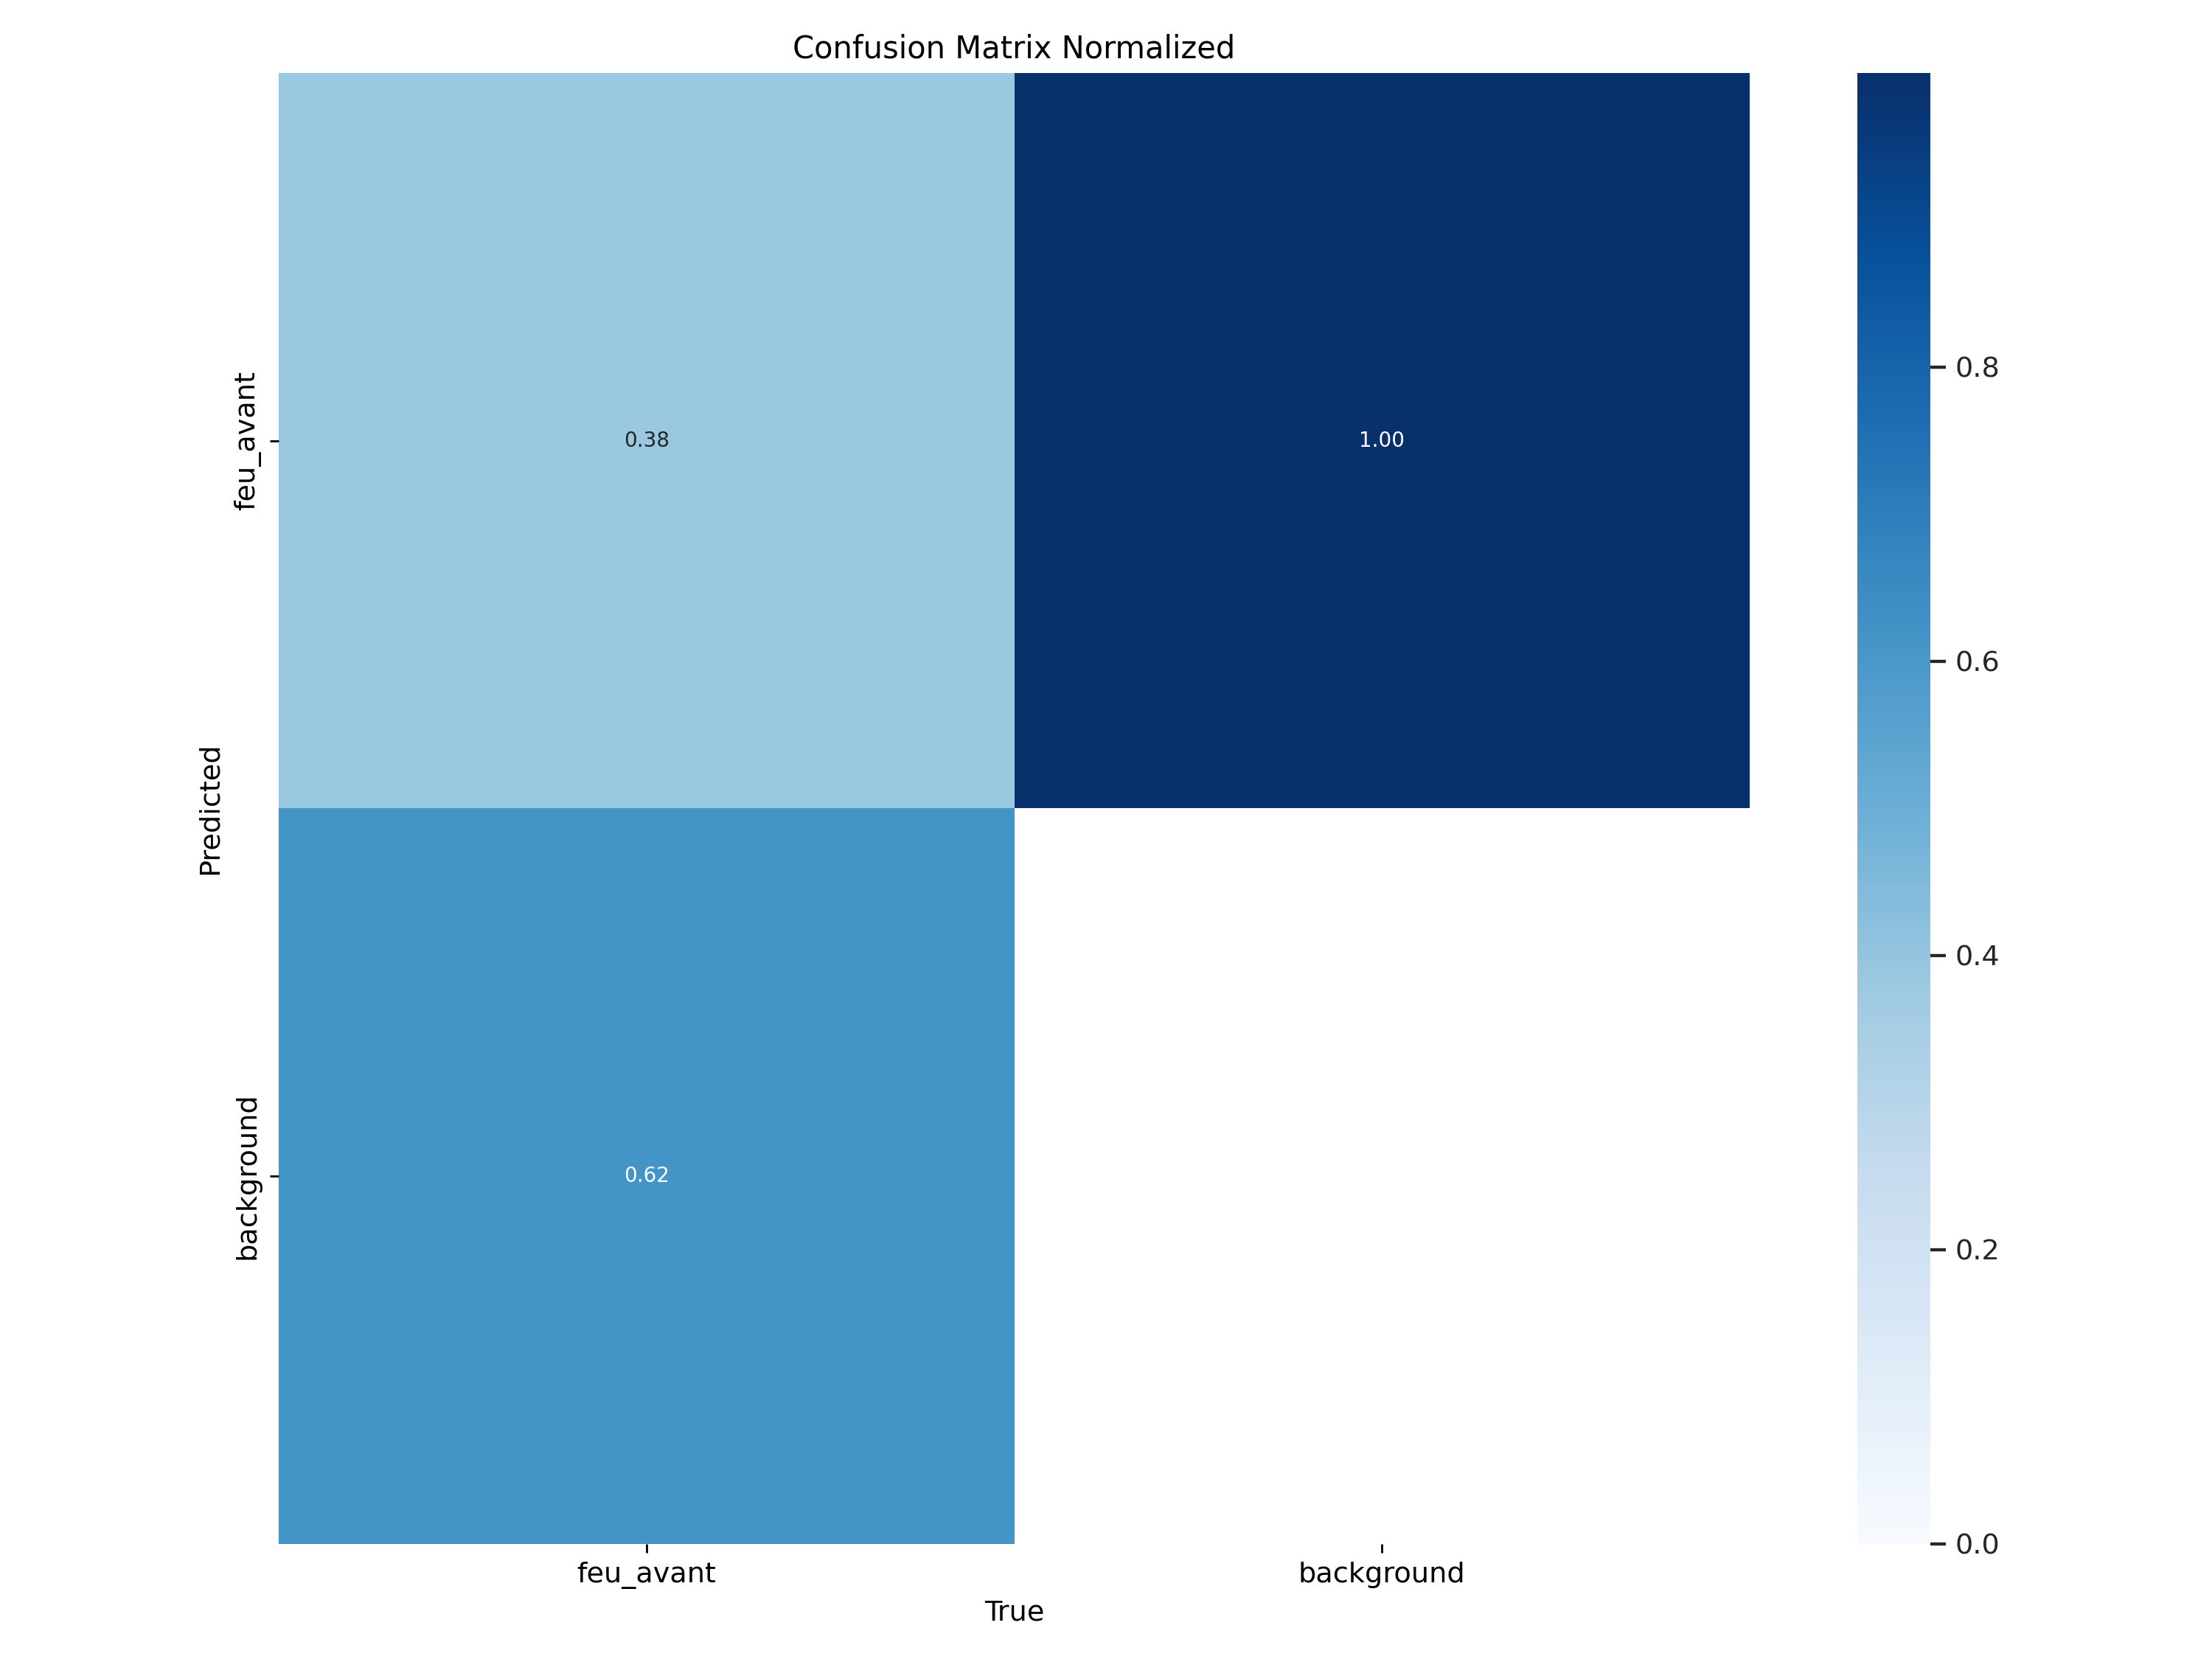

In [6]:
from IPython.display import display, Image
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix_normalized.png', width=1000)

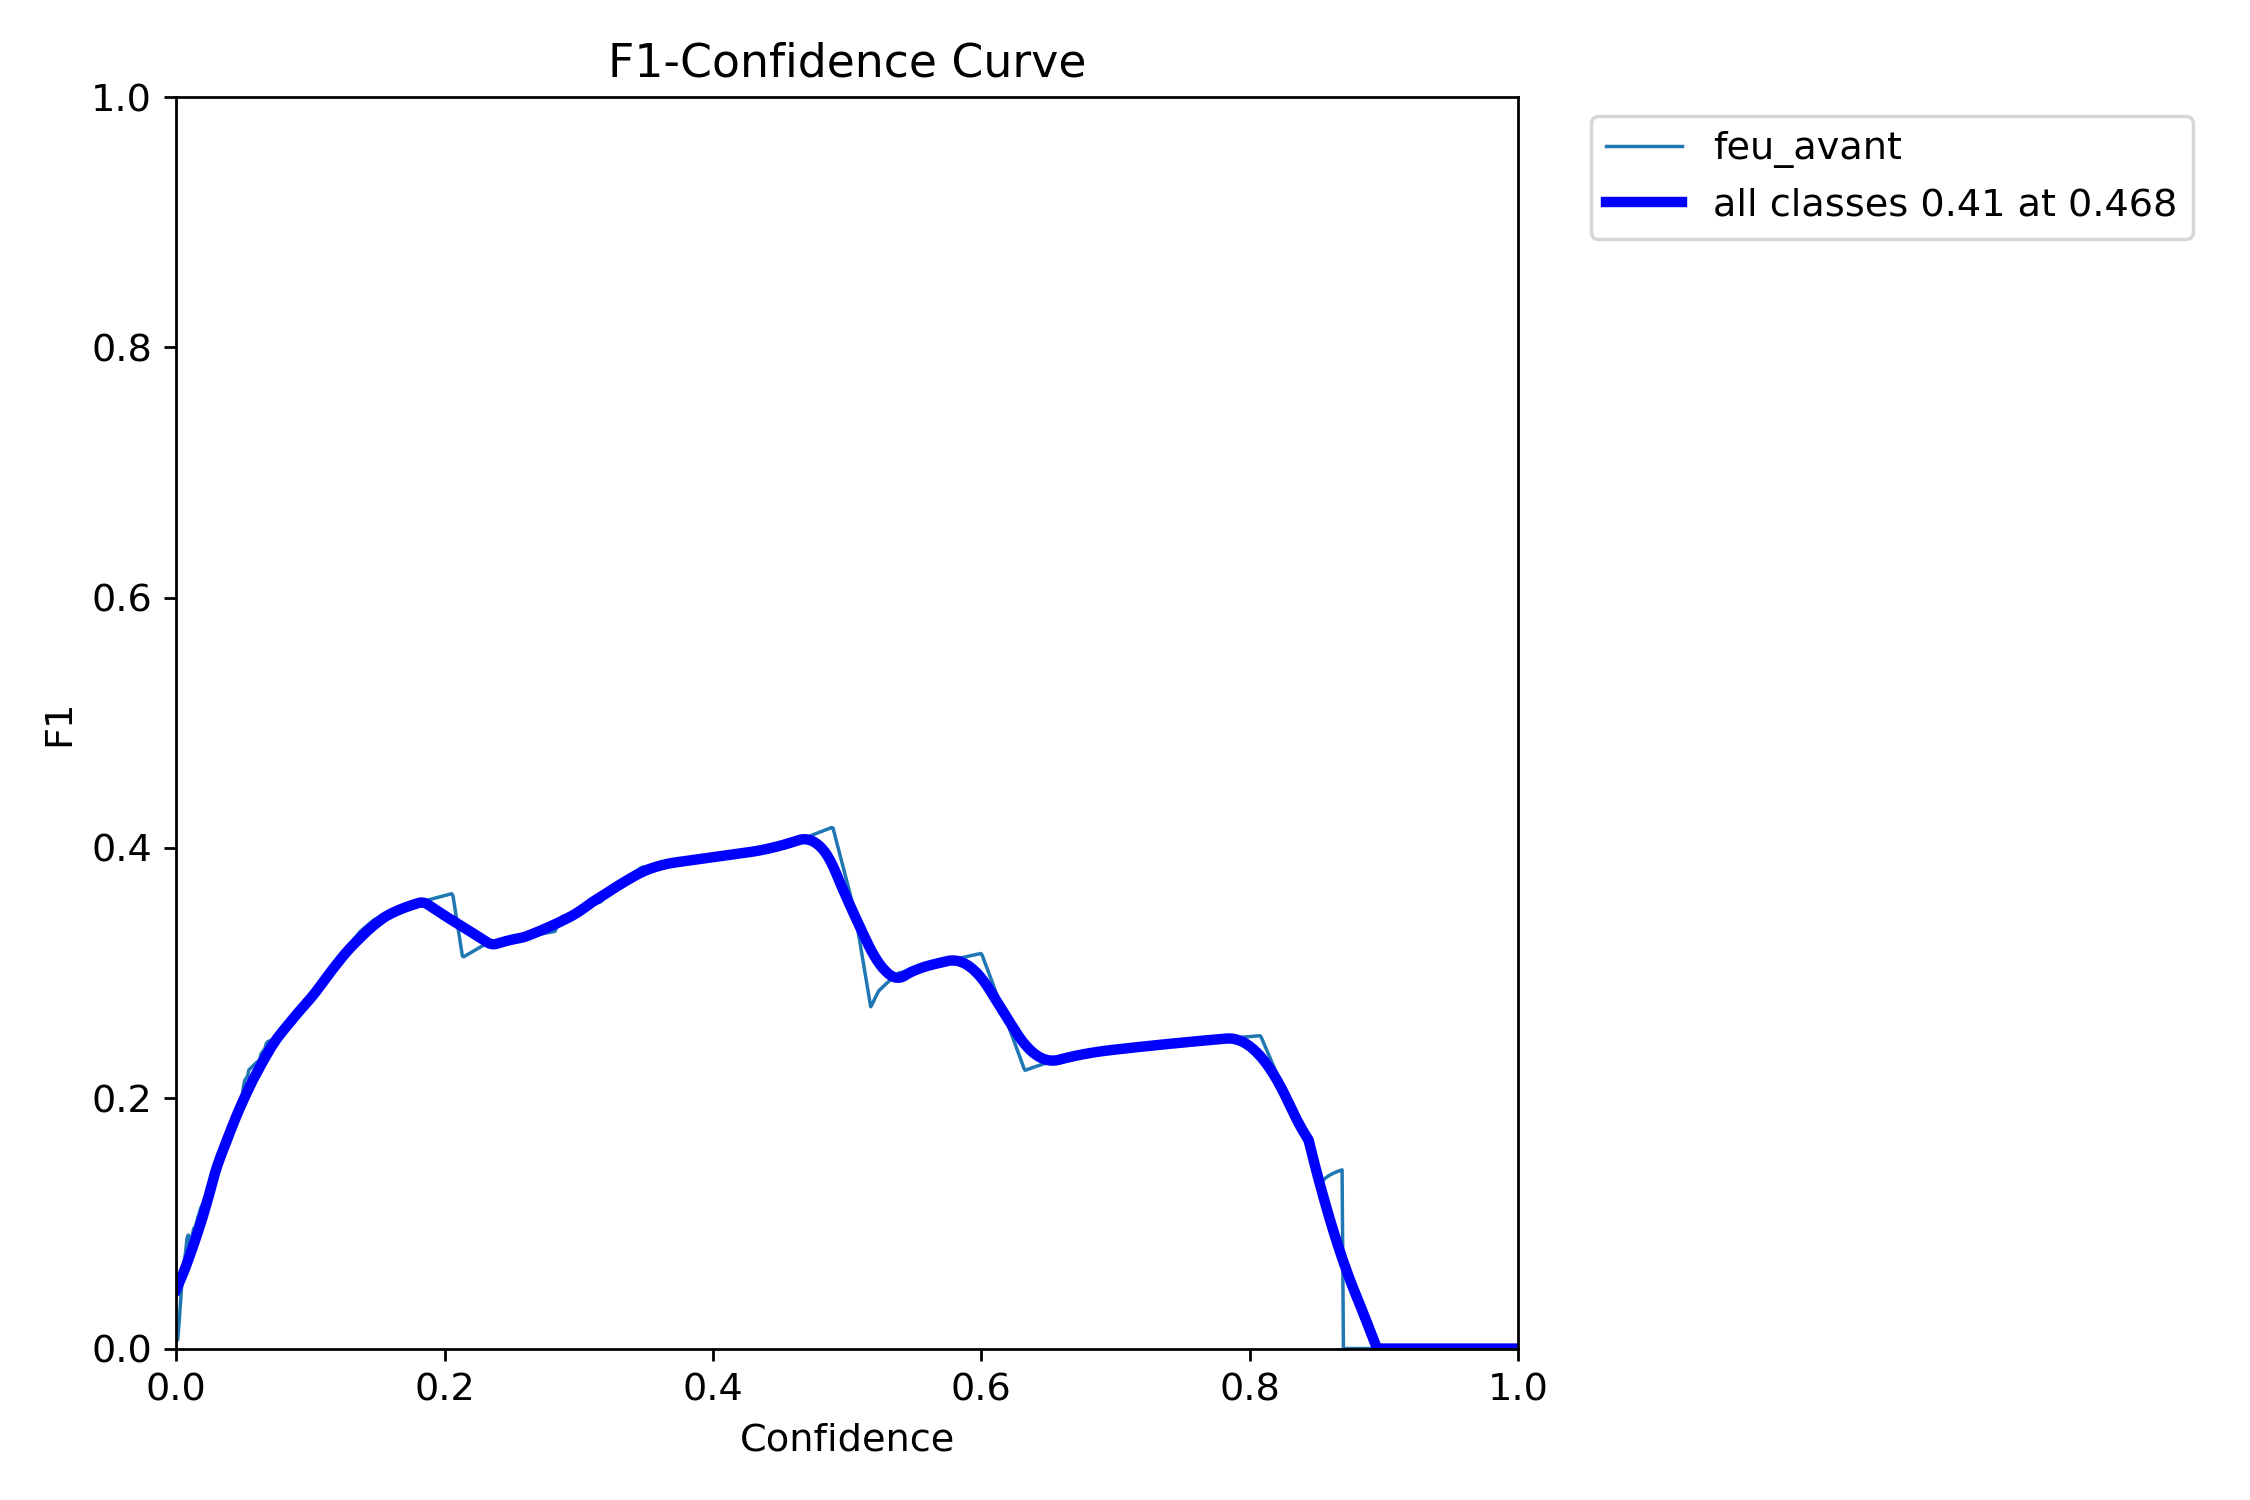

In [7]:
Image(filename=f'{HOME}/runs/detect/train/F1_curve.png', width=1000)

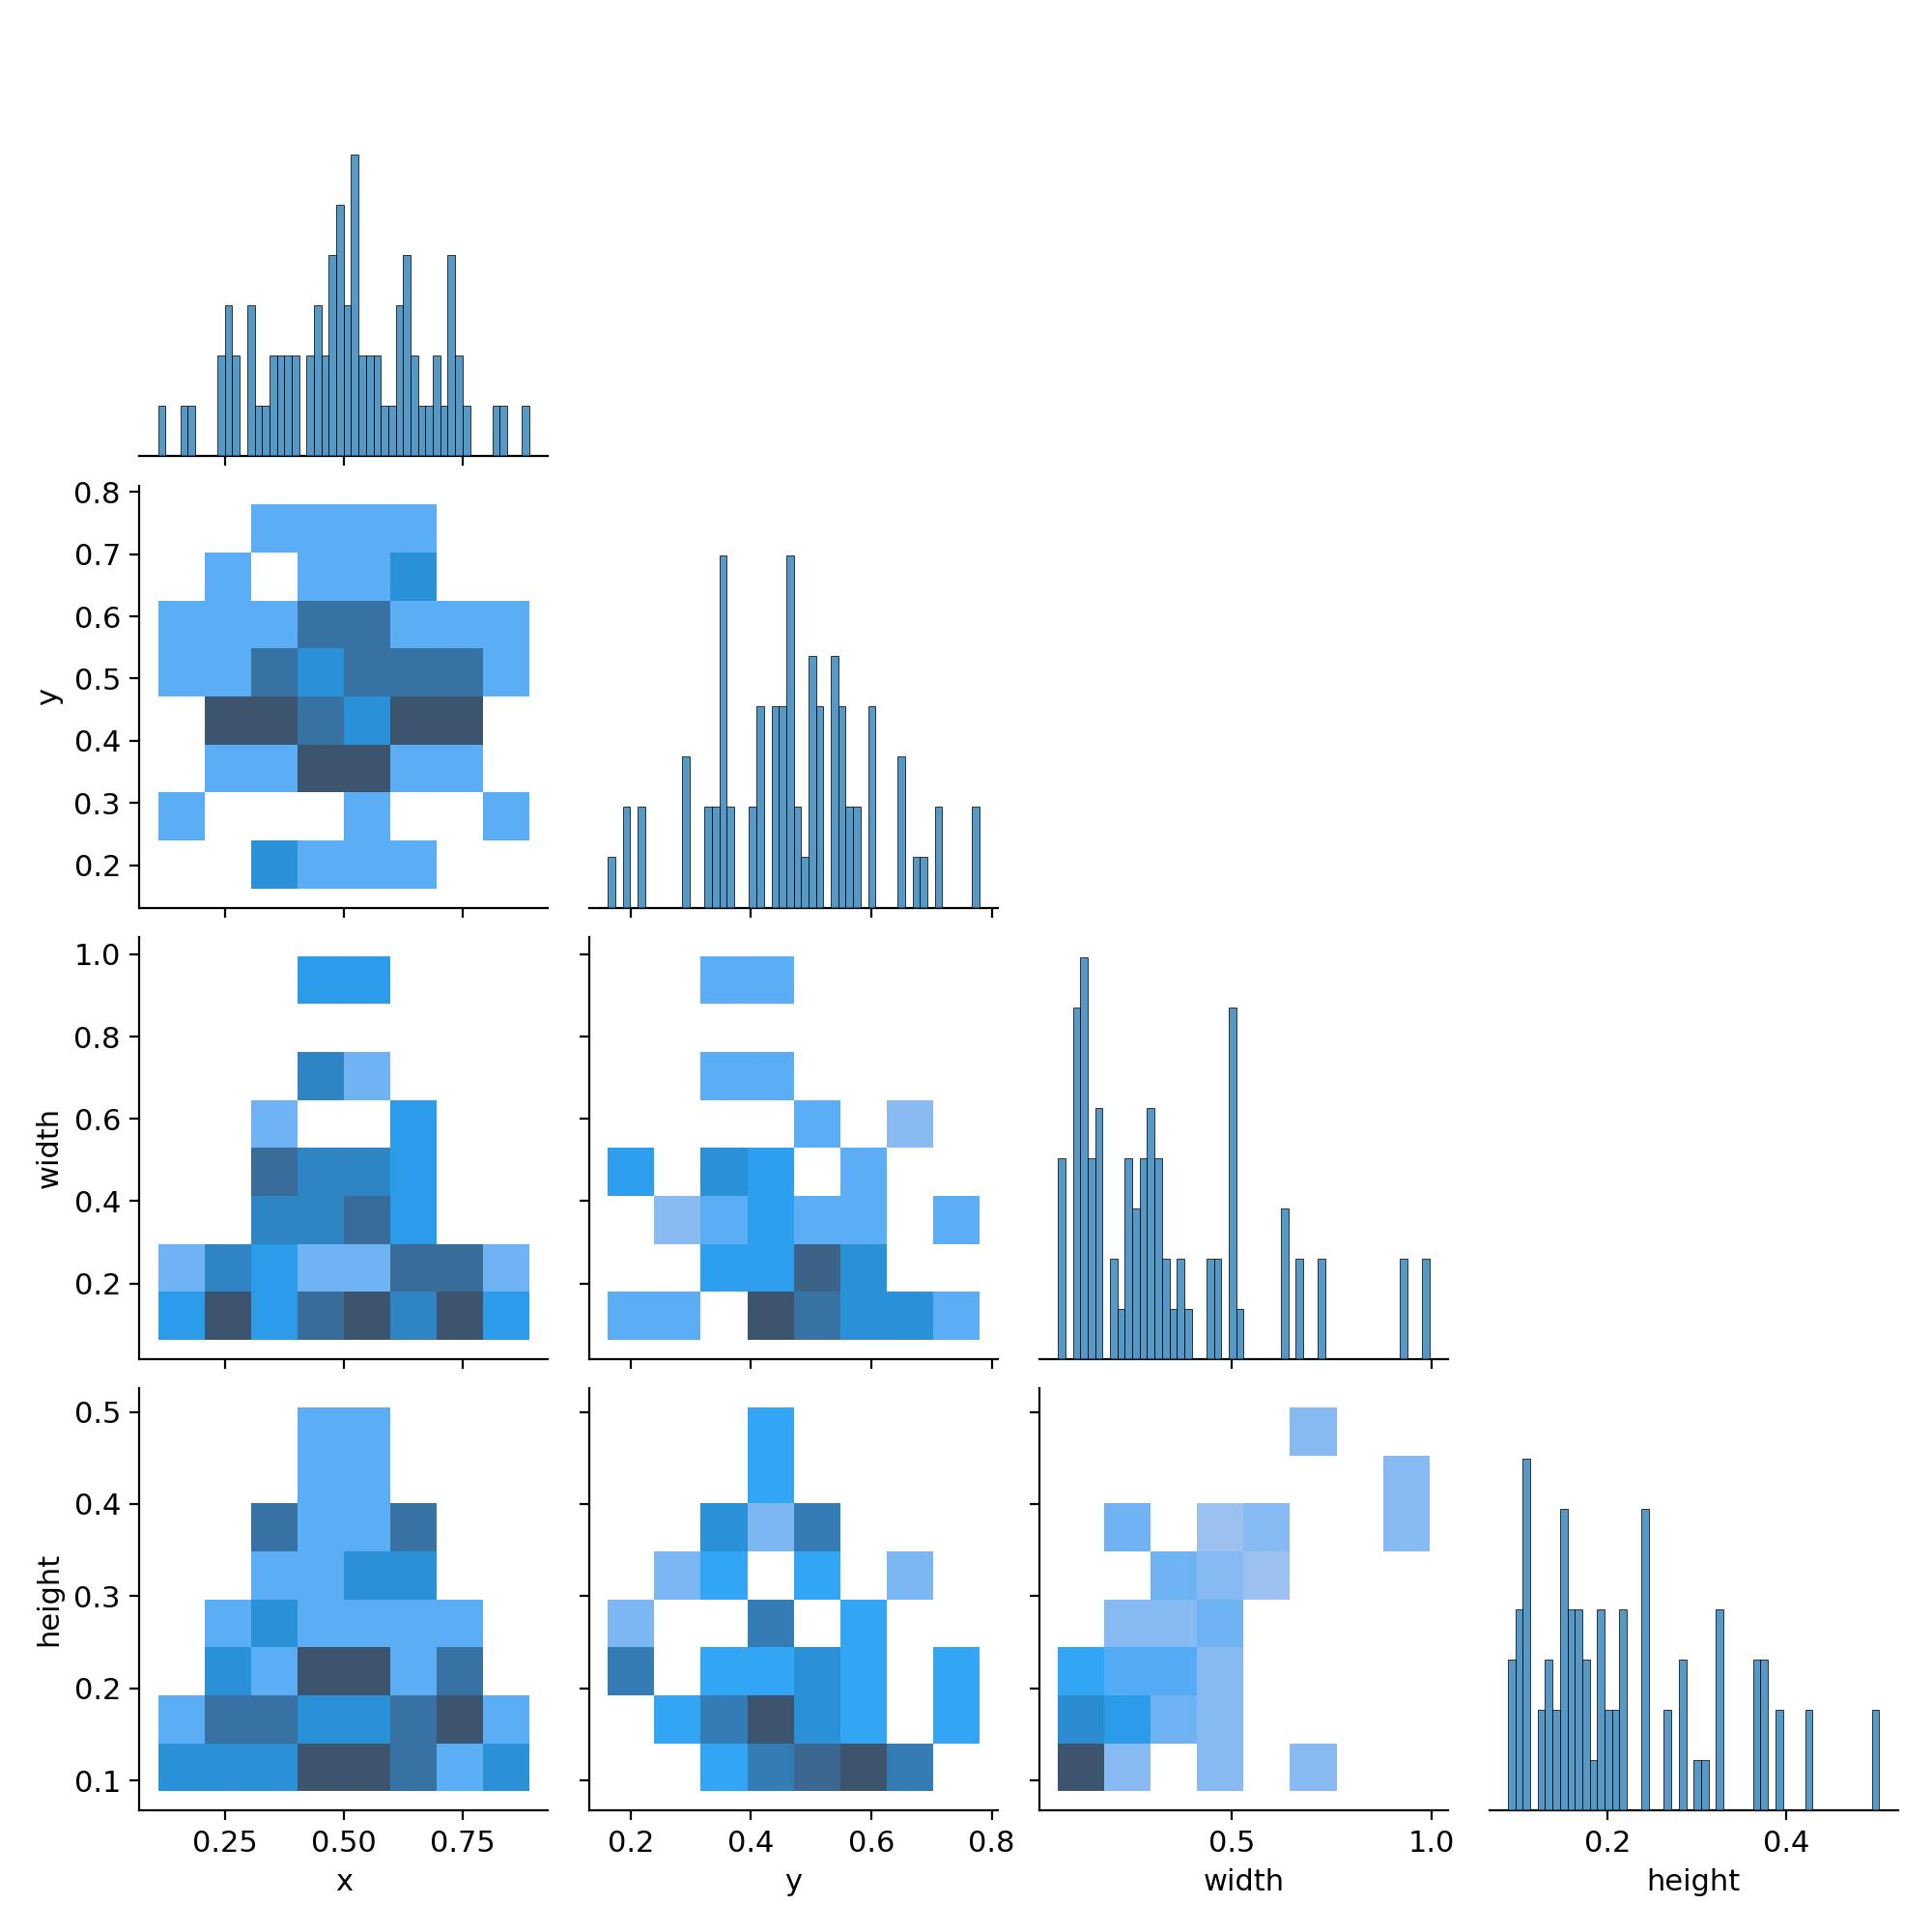

In [8]:
Image(filename=f'{HOME}/runs/detect/train/labels_correlogram.jpg', width=1000)

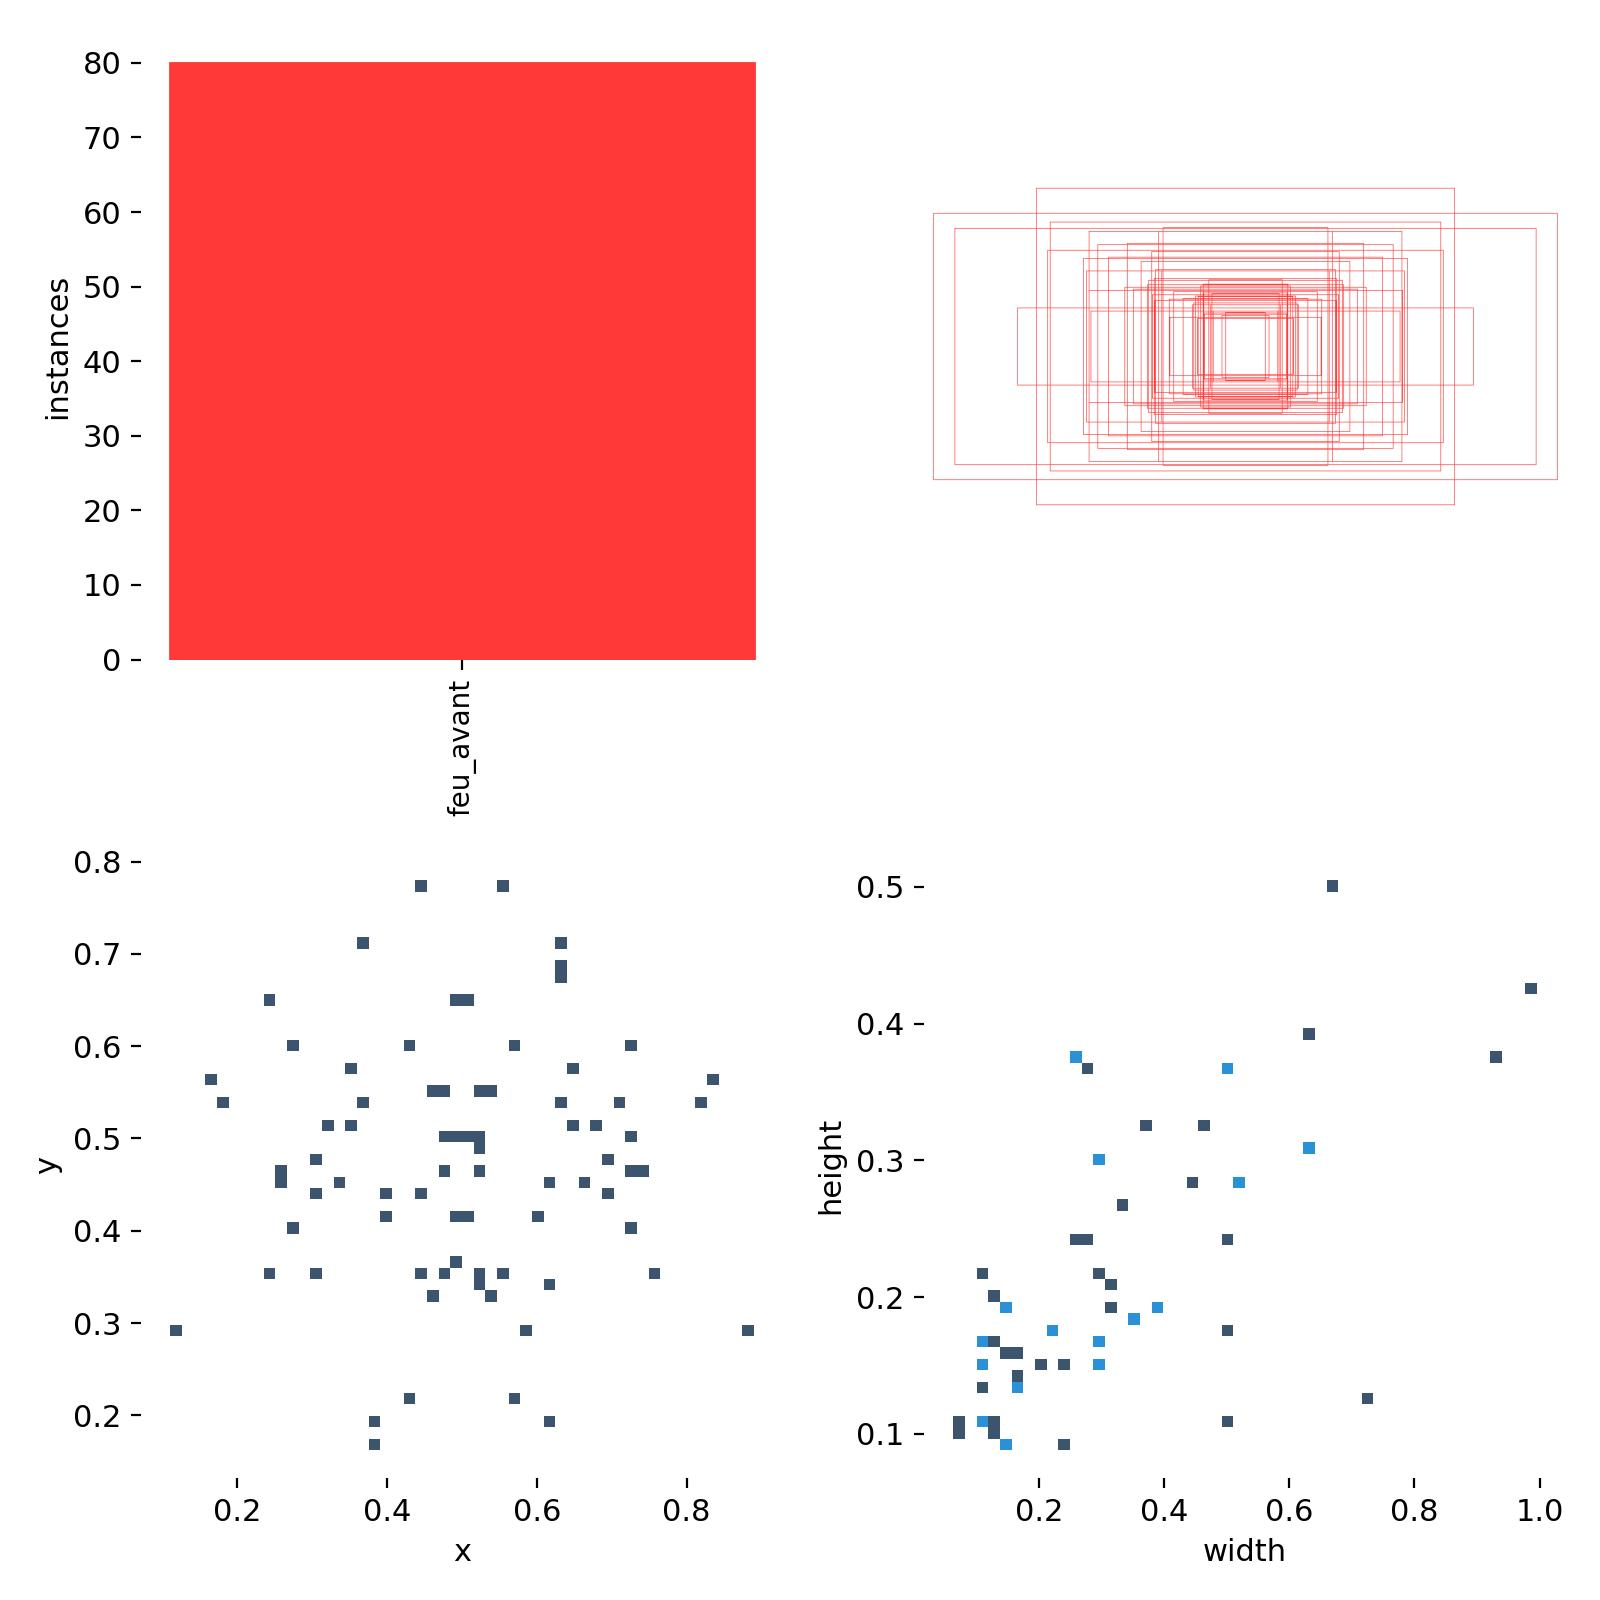

In [9]:
Image(filename=f'{HOME}/runs/detect/train/labels.jpg', width=1000)

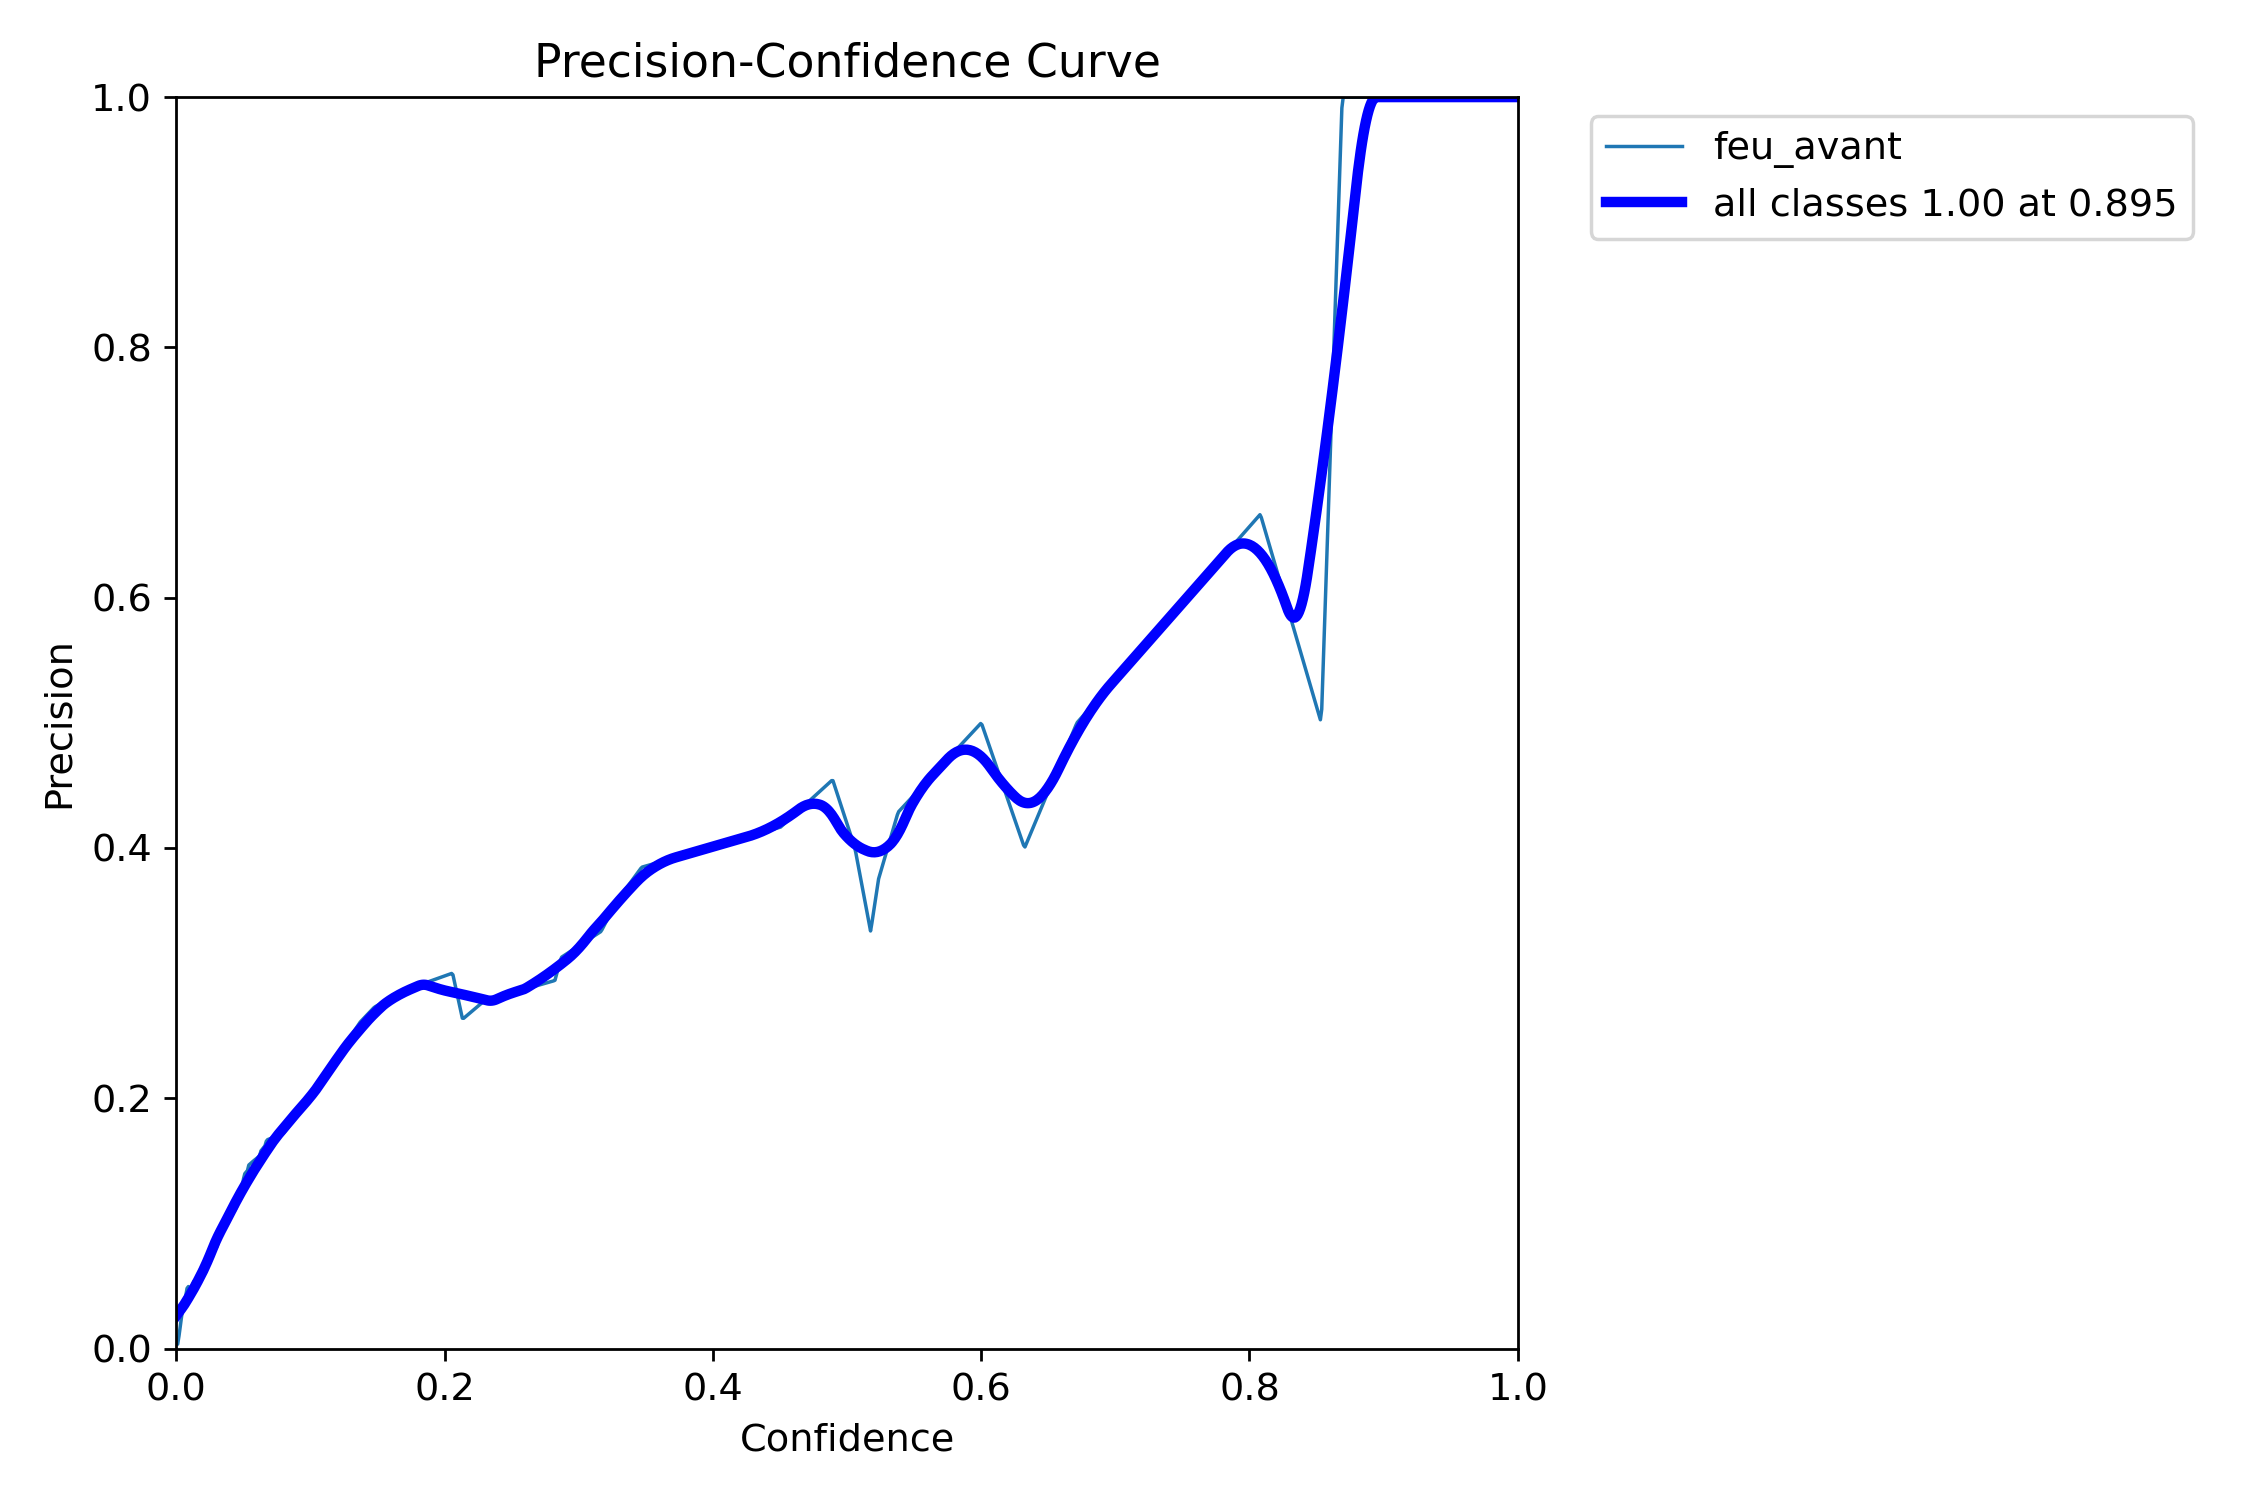

In [10]:
Image(filename=f'{HOME}/runs/detect/train/P_curve.png', width=1000)

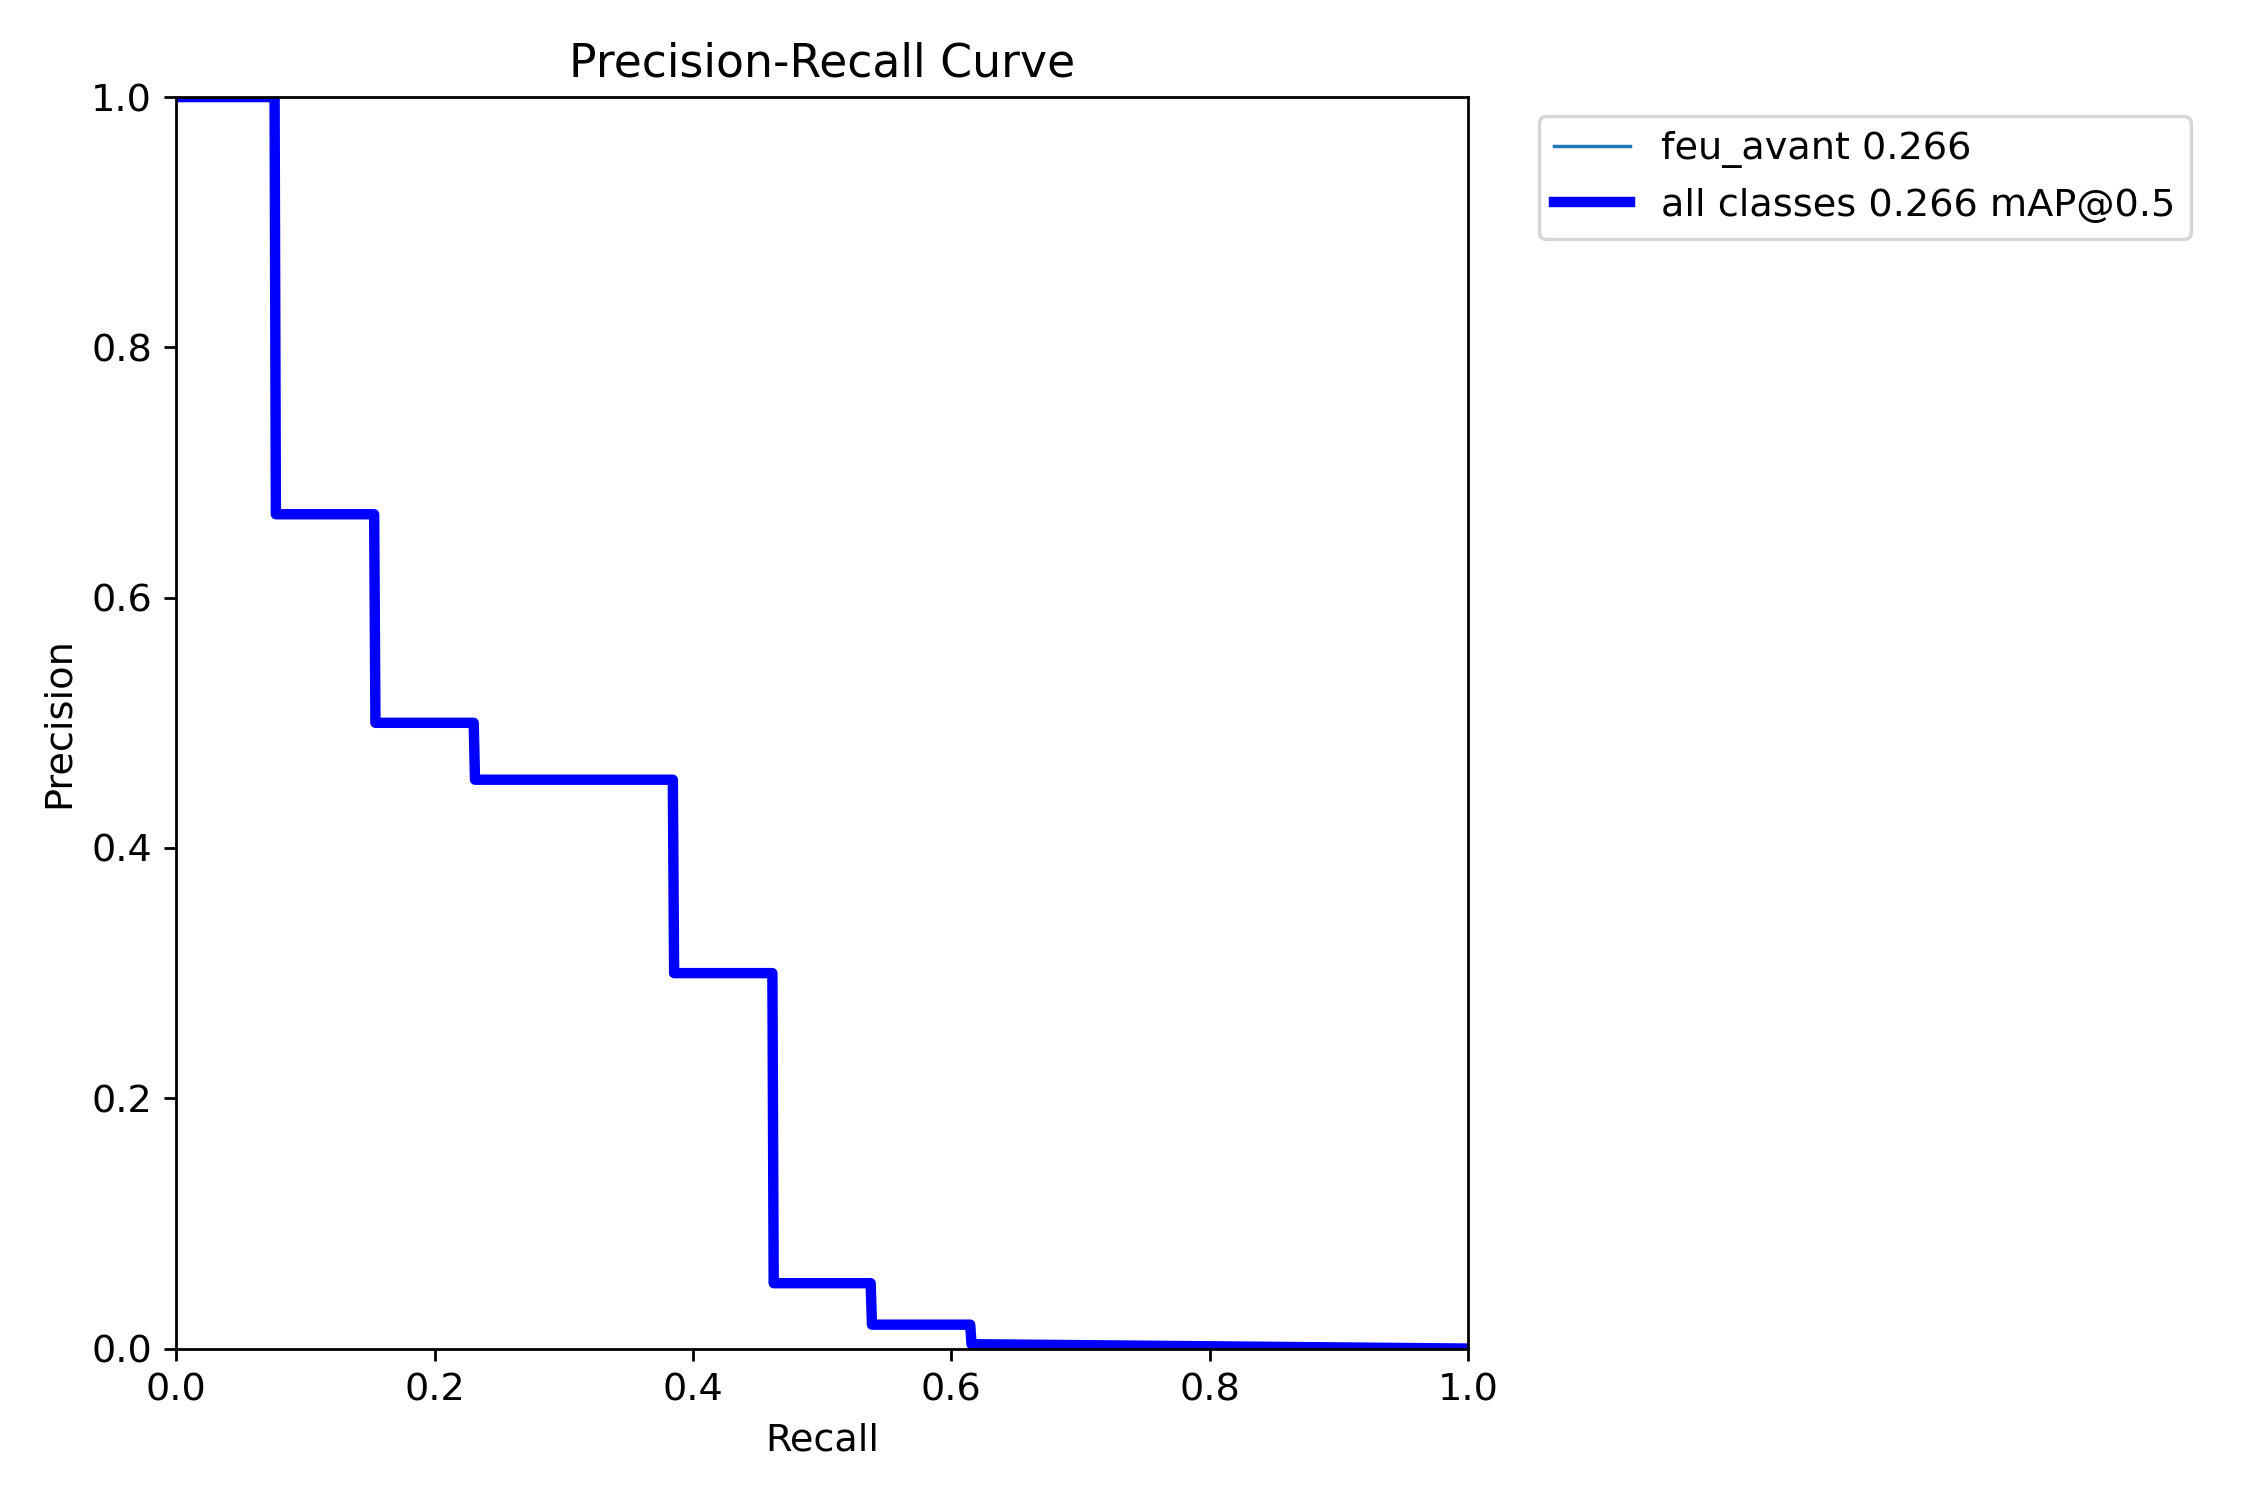

In [11]:
Image(filename=f'{HOME}/runs/detect/train/PR_curve.png', width=1000)

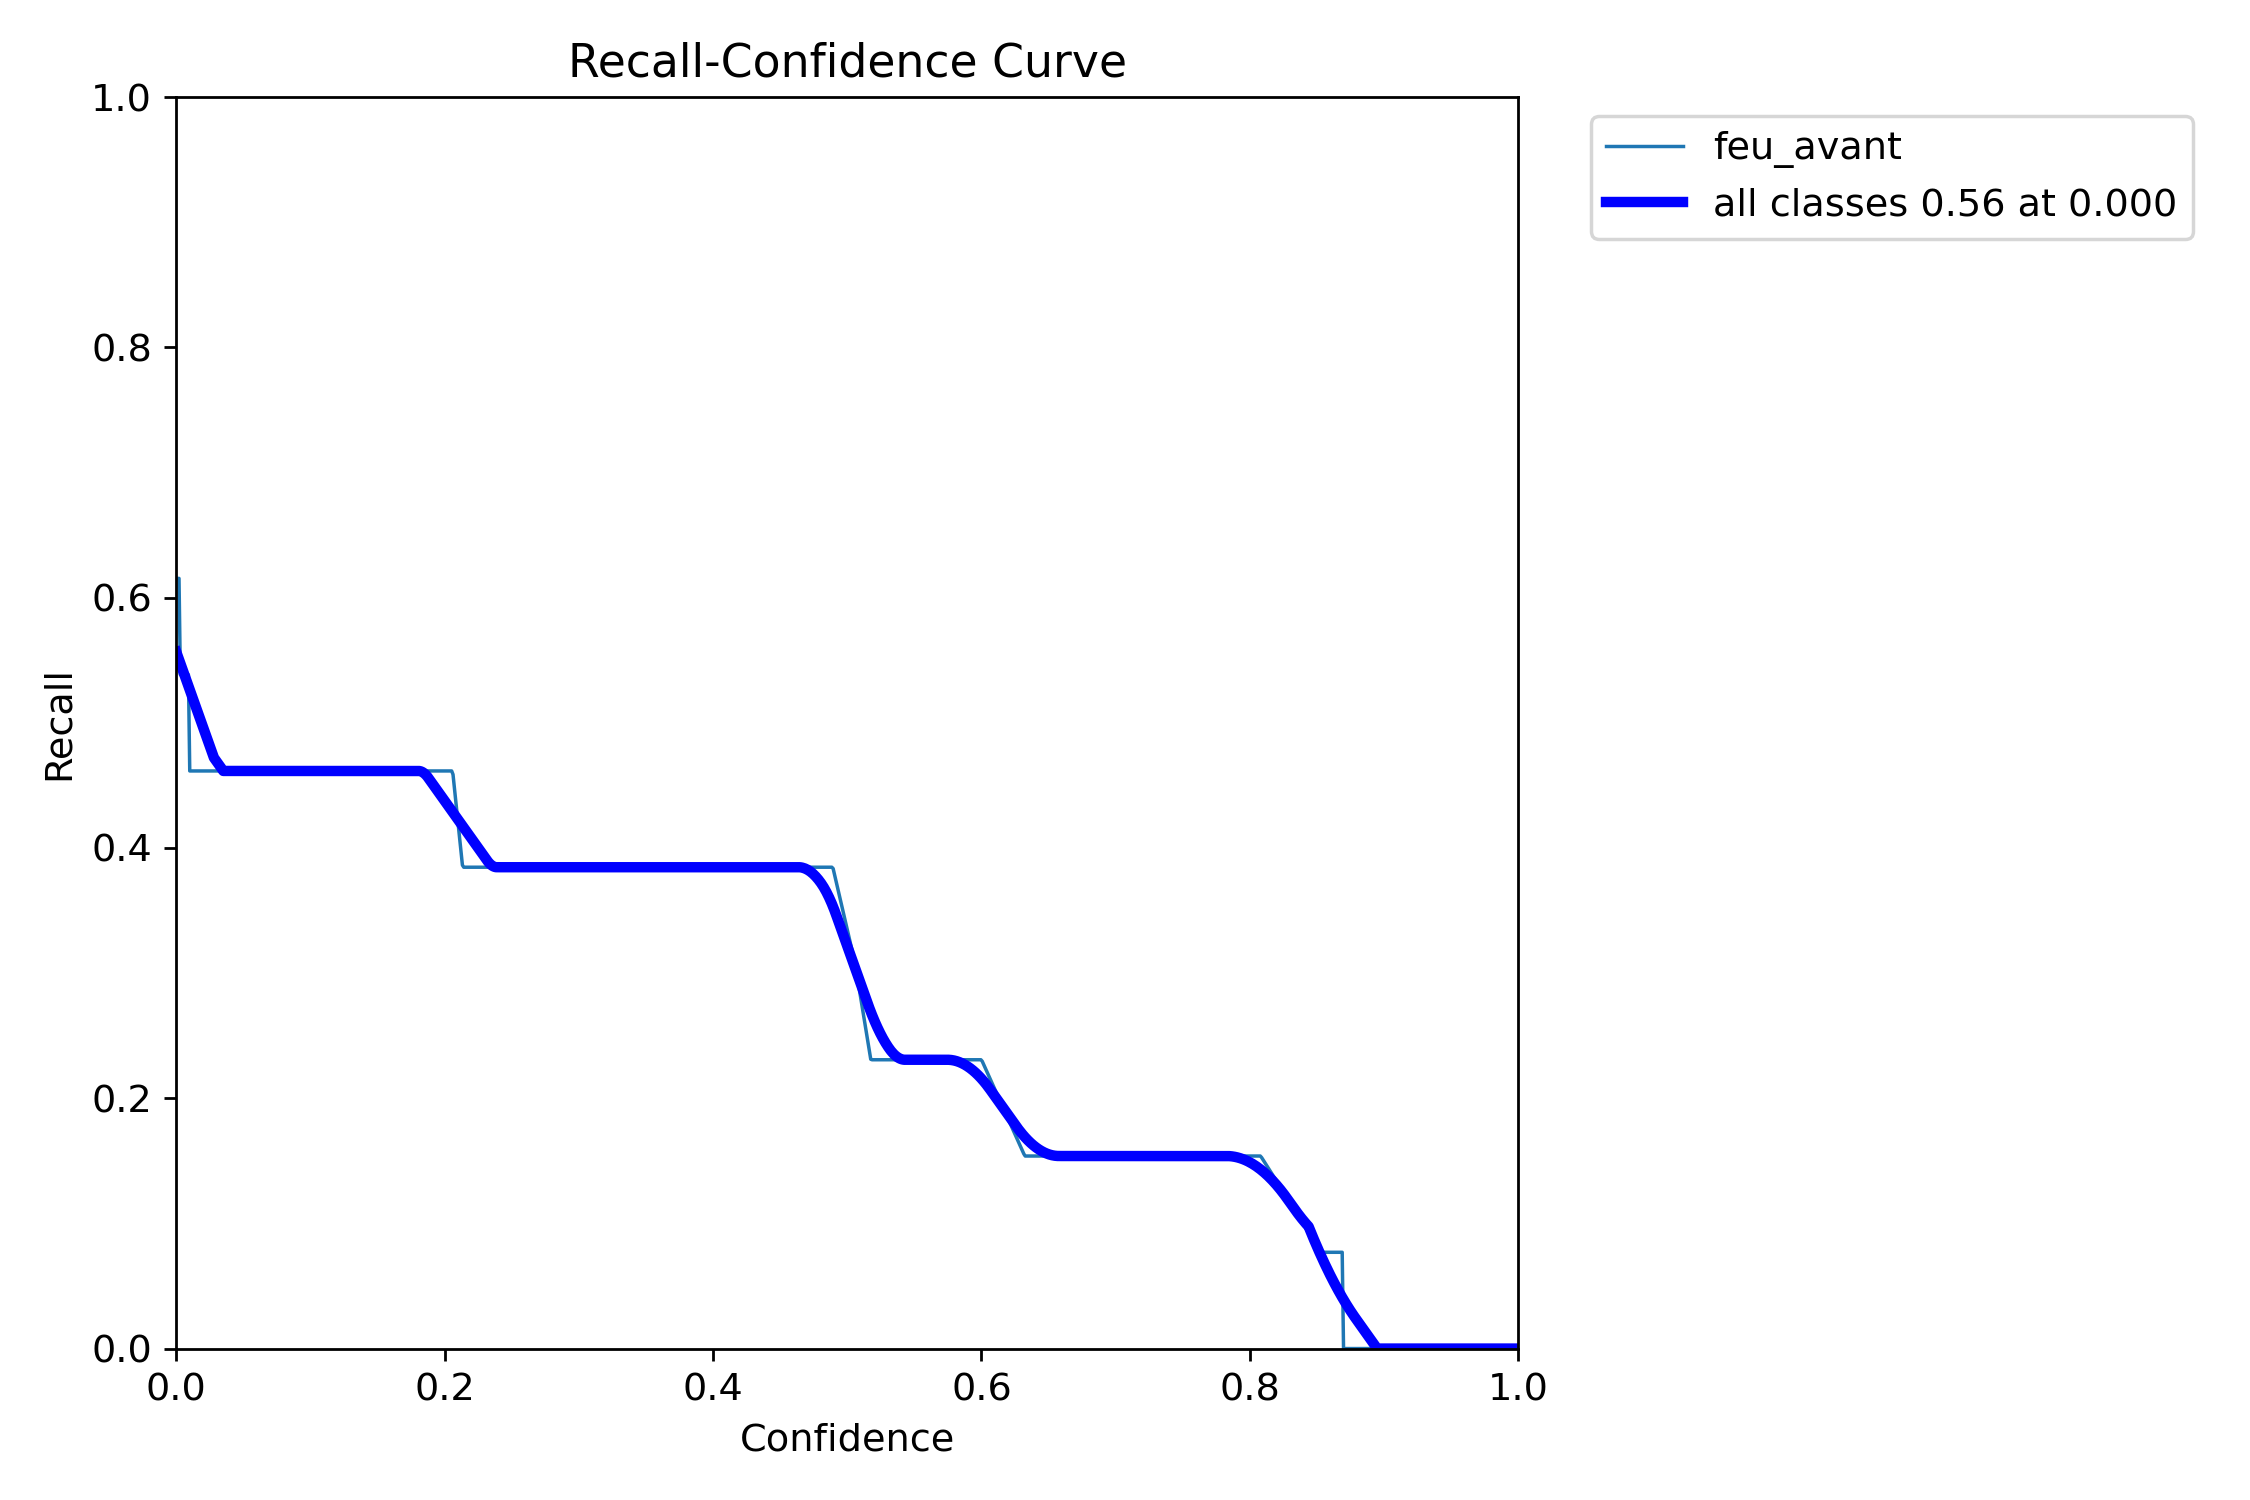

In [12]:
Image(filename=f'{HOME}/runs/detect/train/R_curve.png', width=1000)

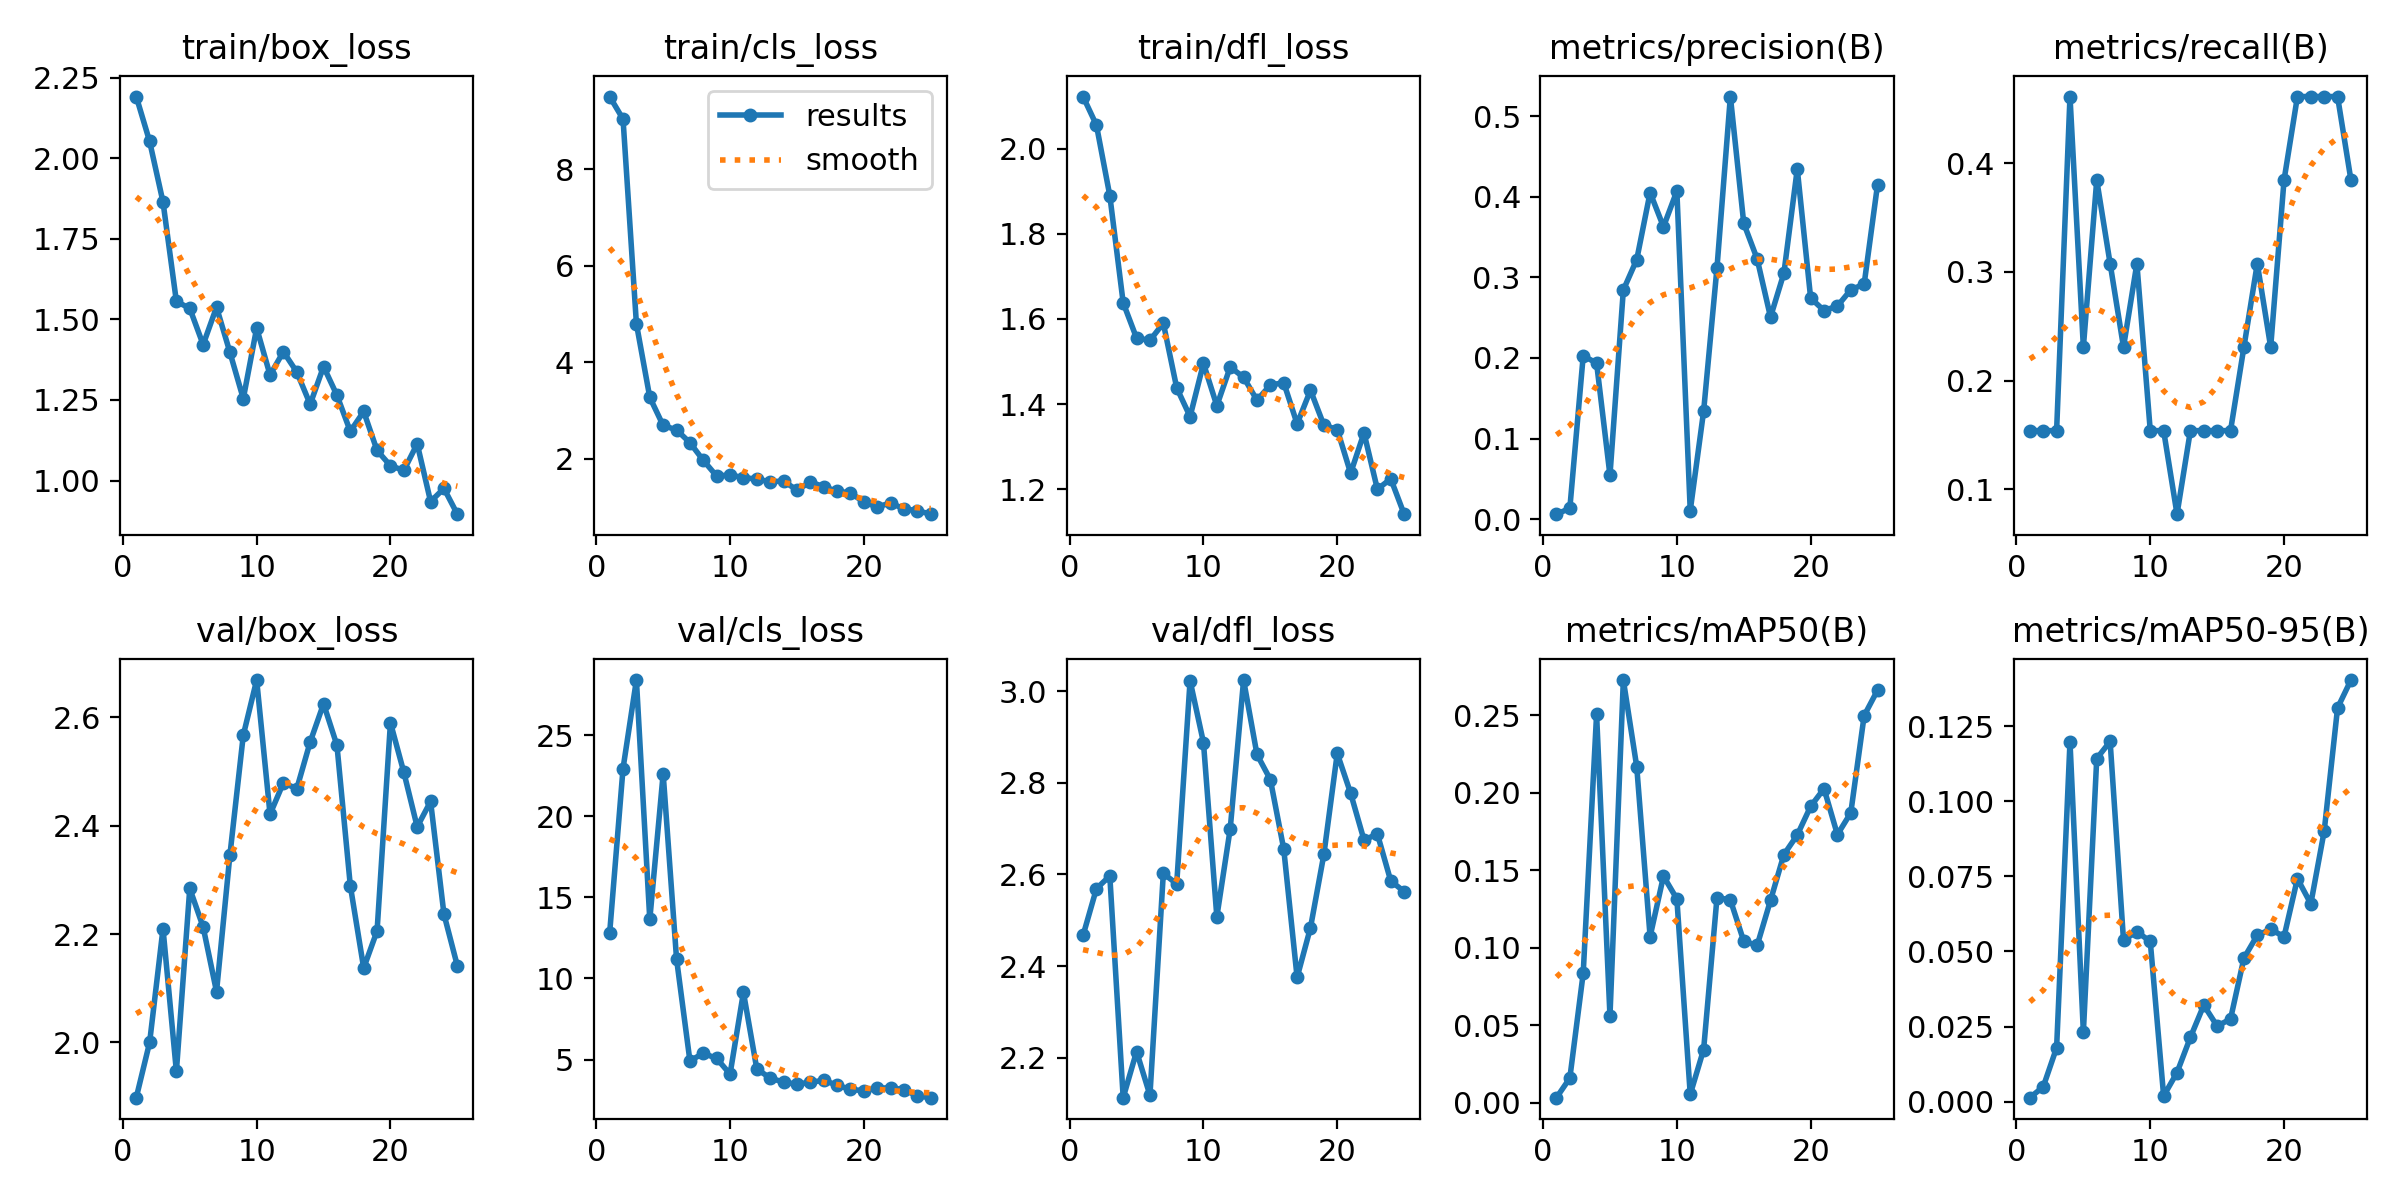

In [13]:
Image(filename=f'{HOME}/runs/detect/train/results.png', width=1000)

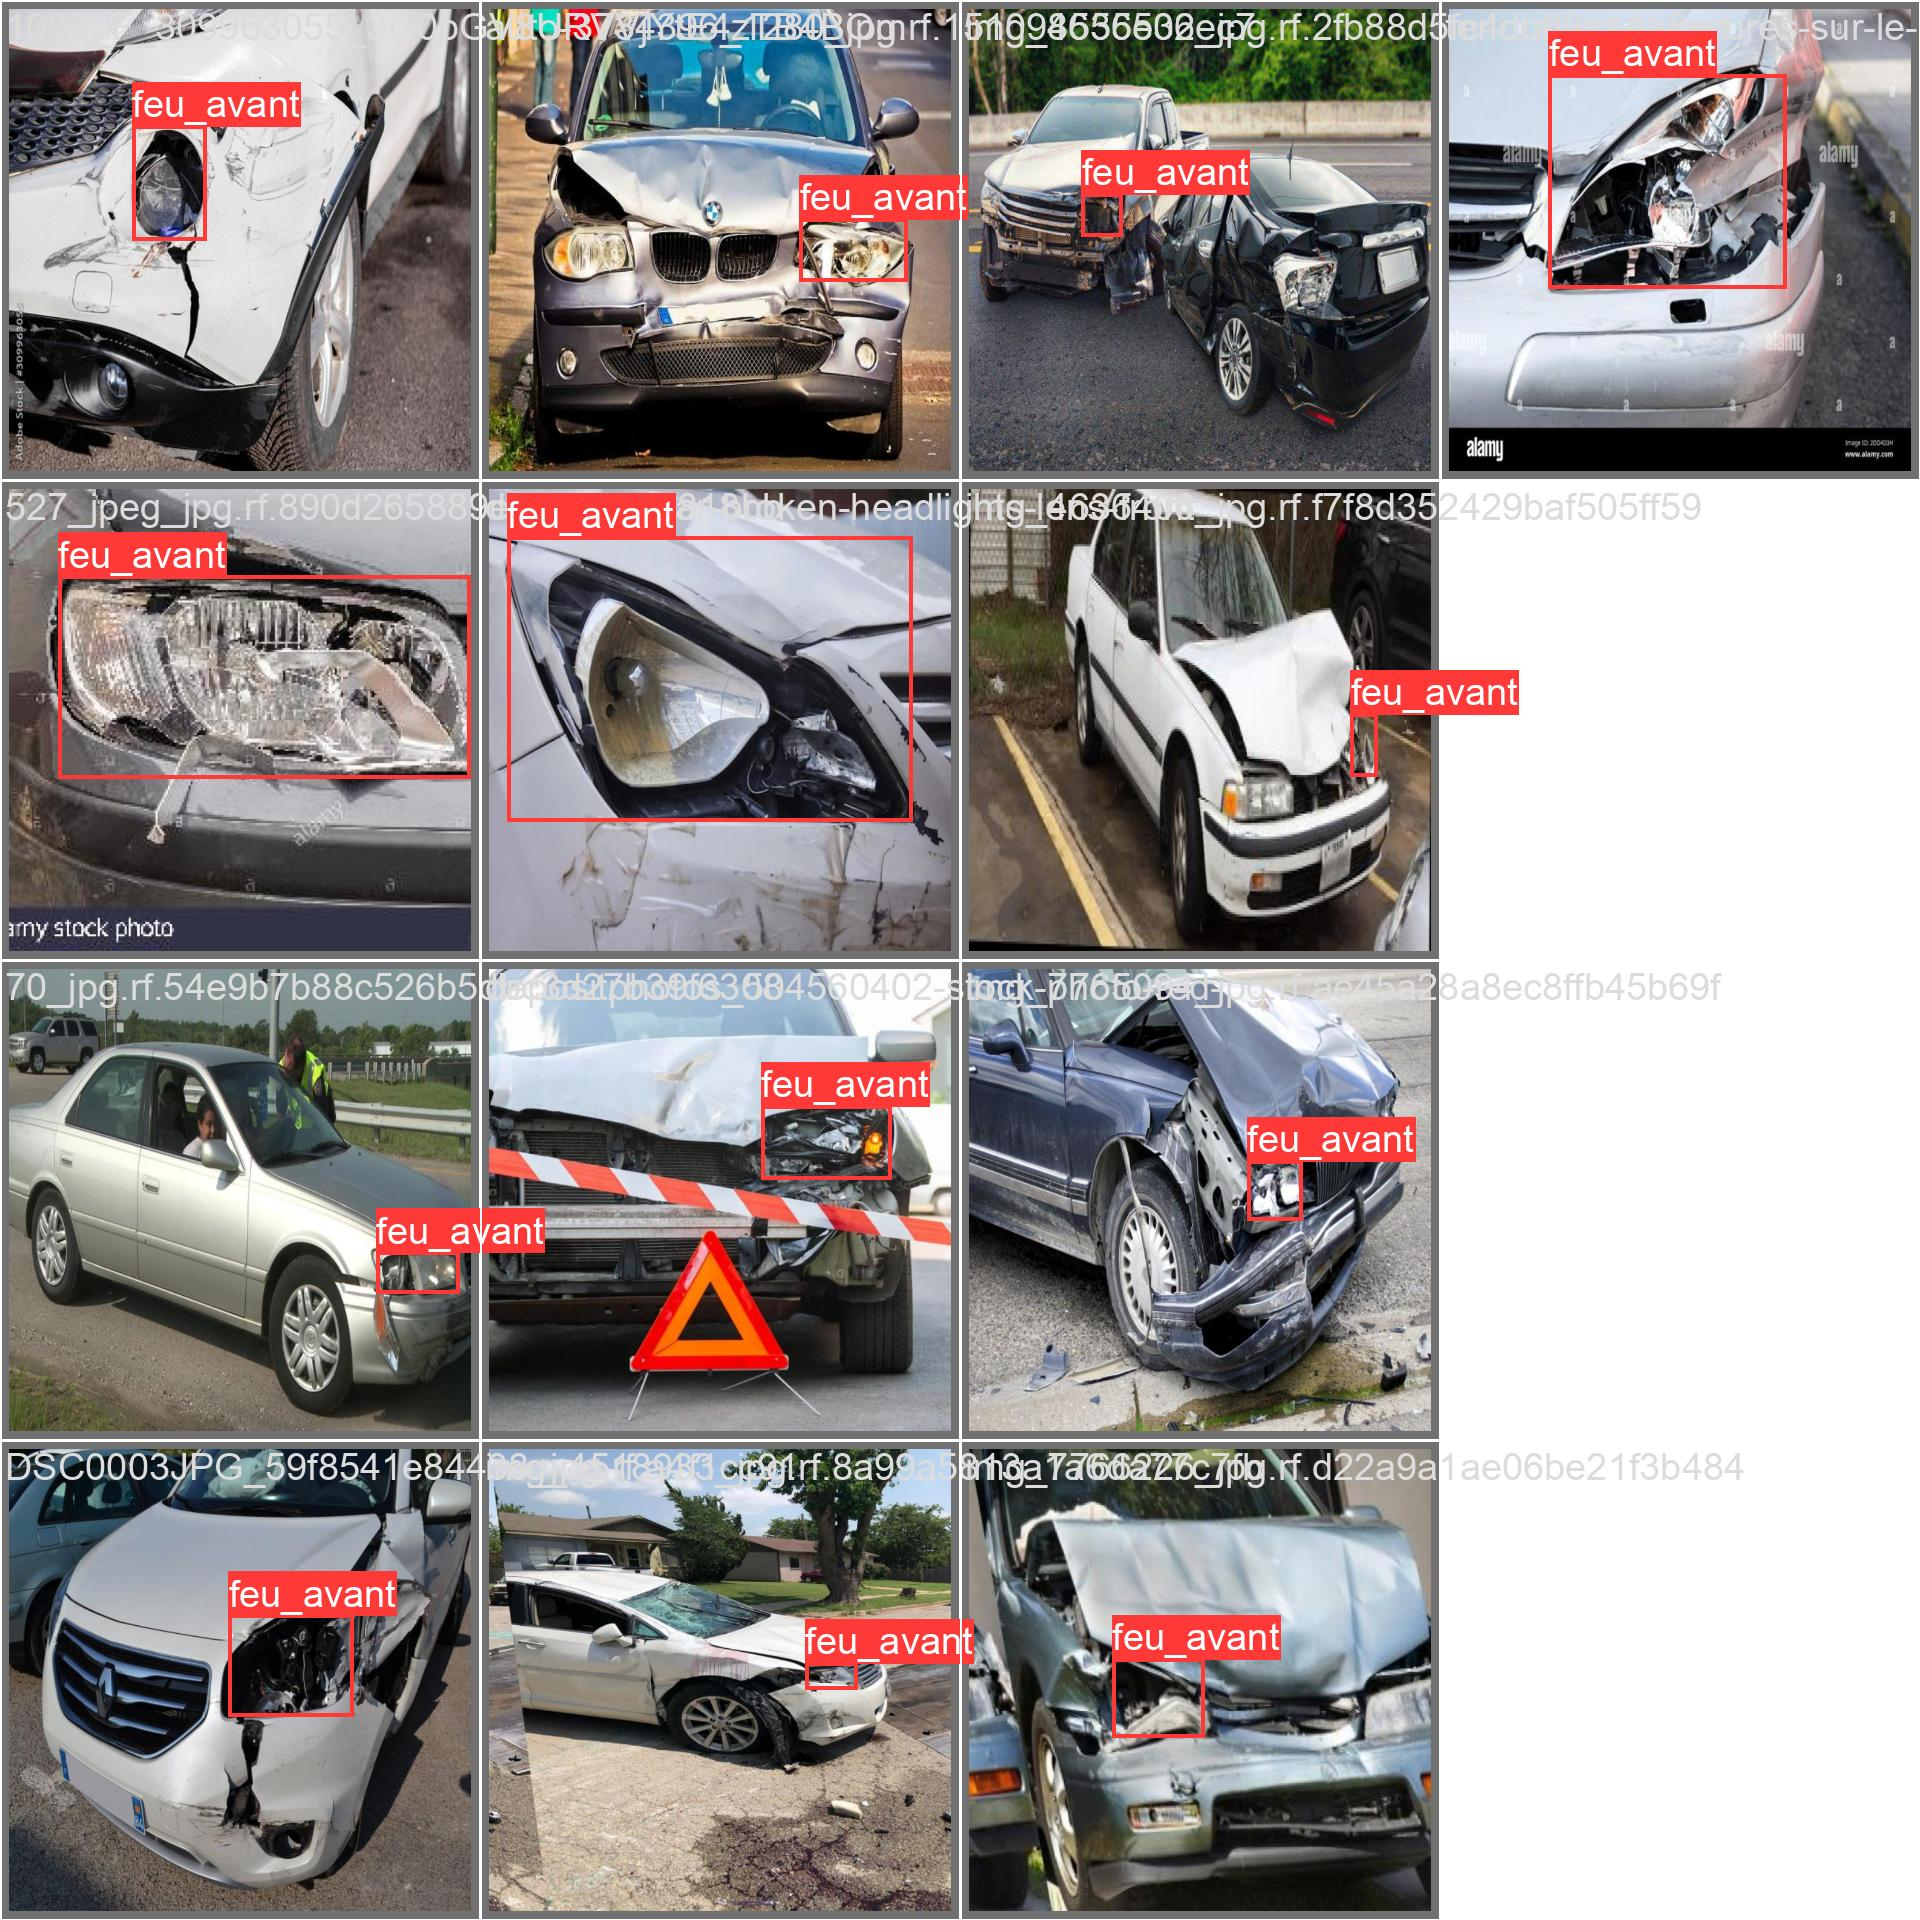

In [14]:
Image(filename=f'{HOME}/runs/detect/train/val_batch0_labels.jpg', width=1000)

In [15]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data=/content/Feu-Avant-1/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/Feu-Avant-1/valid/labels.cache... 13 images, 0 backgrounds, 0 corrupt: 100% 13/13 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:01<00:00,  1.09s/it]
                   all         13         13      0.415      0.385      0.266       0.14
Speed: 0.4ms preprocess, 24.2ms inference, 0.0ms loss, 45.2ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [16]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/Feu-Avant-1/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/6 /content/Feu-Avant-1/test/images/16_jpeg_jpg.rf.1dd1d3988389da14c6e6a954848848e1.jpg: 800x800 2 feu_avants, 22.5ms
image 2/6 /content/Feu-Avant-1/test/images/bb2b6474-8477-4c03-826d-c42441fb9dfc_jpg.rf.556dcf9b5606ac14d4332cbac33a8ebd.jpg: 800x800 (no detections), 22.5ms
image 3/6 /content/Feu-Avant-1/test/images/busted-broken-front-bumper-fender-after-accident-car-sedan-B06T4A_jpg.rf.7607a88a8502ec9093781d86c72840c1.jpg: 800x800 1 feu_avant, 22.4ms
image 4/6 /content/Feu-Avant-1/test/images/car-damage-road-accident-car-insurance_jpg.rf.842cd5f4b5a47a757b3a5e0bede0990f.jpg: 800x800 1 feu_avant, 22.4ms
image 5/6 /content/Feu-Avant-1/test/images/fvoq_jpg.rf.8599e4ef891fd9fe4c6a710e7fc93f35.jpg: 800x800 (no detections), 22.4ms
image 6/6 /content/Feu-Avant-1/test/images/img_4516999_jpg.rf.0d5468e13d9016d

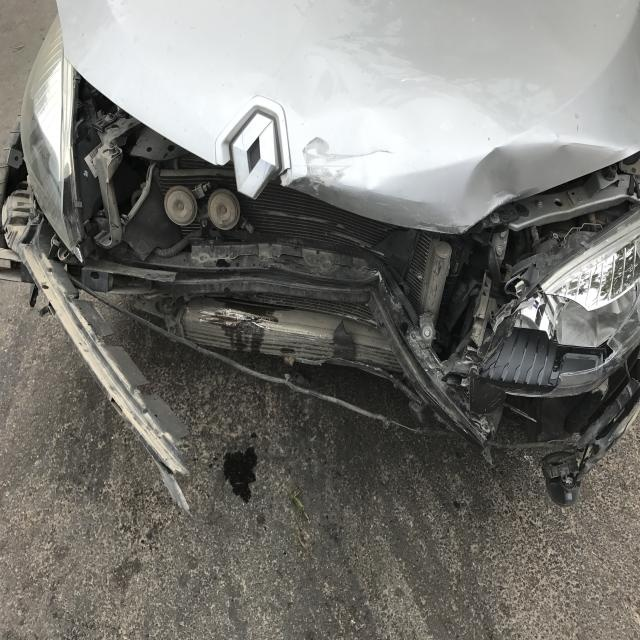

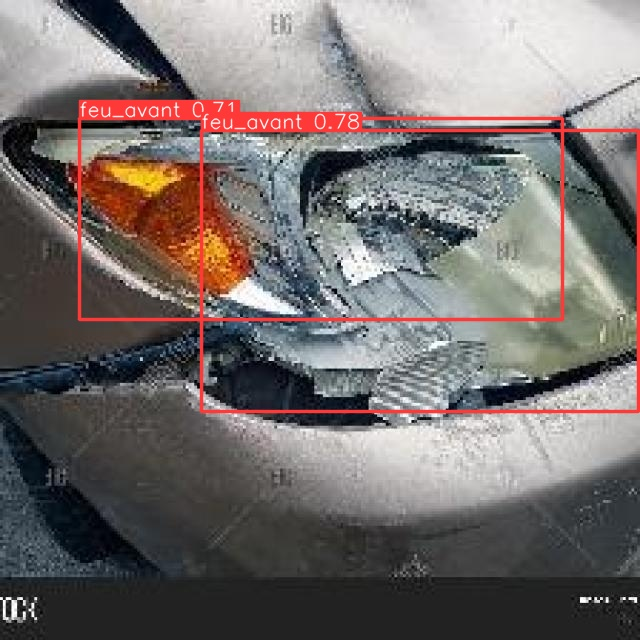

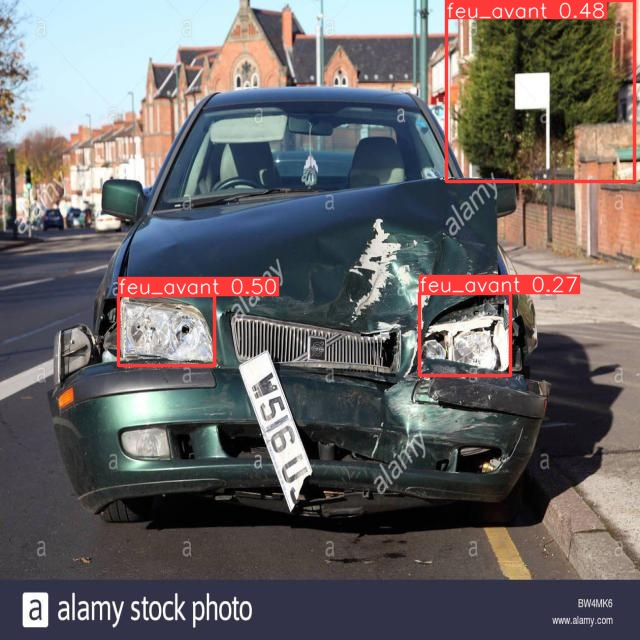

In [17]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")